In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# load data
df = pd.read_csv('/Users/amyliu/Documents/OpenMinds/OM/kaya-identity-co2_1/processed_kaya-identity-co2.csv')



/var/folders/gf/lf9k9p2j5j5fcvdnh2mcnqpc0000gn/T/ipykernel_34820/4141278816.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/amyliu/Documents/OpenMinds/OM/kaya-identity-co2_1/processed_kaya-identity-co2.csv')


In [17]:
df_filtered_year = df[df['Year'] >= 1990]

In [20]:
df_filtered_year.head()

,Entity,Code,Year,Annual CO₂ emissions,Primary energy consumption per GDP (kWh/$),GDP per capita,900793-annotations,Population (historical),Annual CO₂ emissions per unit energy (kg per kilowatt-hour),Annual CO₂ emissions per GDP (kg per international-$)
41,Afghanistan,AFG,1990,2024326.1,2.311106,963.00000,NaN,12045622.0,0.063767,0.154931
42,Afghanistan,AFG,1991,1914301.0,1.037307,881.17040,NaN,12238831.0,0.137692,0.158898
43,Afghanistan,AFG,1992,1482054.0,0.647377,843.87537,NaN,13278937.0,0.161659,0.116904
44,Afghanistan,AFG,1993,1486943.0,0.829252,578.40280,NaN,14943125.0,0.163304,0.151195
45,Afghanistan,AFG,1994,1453829.0,0.993833,428.42456,NaN,16250755.0,0.164910,0.183568


In [21]:
df_filtered_year['Entity'].unique()

array(['Afghanistan', 'Africa', 'Africa (GCP)', 'Africa (UN)',
       'Akrotiri and Dhekelia', 'Albania', 'Algeria', 'American Samoa',
       'Americas (UN)', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (GCP)', 'Asia (UN)', 'Asia (excl. China and India)',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic',
       'Central America (GCP)', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curaca

In [59]:
entities = ['United States', 'China', 'India', 'European Union (27)', 'Middle East', 'Africa', 'South and Central America']


In [60]:
df_filtered_regions = df_filtered_year[df_filtered_year['Entity'].isin(['United States', 'China', 'India'])]

In [61]:
eu_27 = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

# df_eu_27 = df_filtered_year[df_filtered_year['Entity'].isin(eu_27)]

# df_eu_27['Entity'] = 'European Union (27)'

# df_filtered_regions = pd.concat([df_filtered_regions, df_eu_27], ignore_index=True)



middle_east = ['Bahrain', 'Iran', 'Iraq', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen']

# df_me = df_filtered_year[df_filtered_year['Entity'].isin(middle_east)]

# df_me['Entity'] = 'Middle East'

# df_filtered_regions = pd.concat([df_filtered_regions, df_me], ignore_index=True)


africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Cote Cote d\'Ivoire', 'Democratic Republic of Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

# df_africa = df_filtered_year[df_filtered_year['Entity'].isin(africa)]

# df_africa['Entity'] = 'Africa'

# df_filtered_regions = pd.concat([df_filtered_regions, df_africa], ignore_index=True)


americas = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Curacao', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela']

# df_americas = df_filtered_year[df_filtered_year['Entity'].isin(americas)]

# df_americas['Entity'] = 'South and Central America'

# df_filtered_regions = pd.concat([df_filtered_regions, df_americas], ignore_index=True)

region_map = {
    "European Union (27)": eu_27,
    "Middle East": middle_east,
    "Africa": africa,
    "Central and South America": americas
}




In [62]:
# --- 2. Helper function for weighted mean ---
def weighted_mean(df, value_col, weight_col):
    vals = df[value_col]
    weights = df[weight_col]
    if weights.sum() == 0:
        return float('nan')
    return (vals * weights).sum() / weights.sum()

# --- 3. Aggregation function for a region ---
def aggregate_region(df, region_name, country_list):
    region_df = df[df['Entity'].isin(country_list)]
    grouped = []
    for year, group in region_df.groupby('Year'):
        row = {
            'Entity': region_name,
            'Code': None,  # No ISO code for constructed region
            'Year': year,
            'Annual CO₂ emissions': group['Annual CO₂ emissions'].sum(),
            'Primary energy consumption per GDP (kWh/$)': weighted_mean(group, 'Primary energy consumption per GDP (kWh/$)', 'GDP per capita'),
            'GDP per capita': weighted_mean(group, 'GDP per capita', 'Population (historical)'),
            '900793-annotations': None,  # Or set to a region-specific note if you wish
            'Population (historical)': group['Population (historical)'].sum(),
            'Annual CO₂ emissions per unit energy (kg per kilowatt-hour)': weighted_mean(group, 'Annual CO₂ emissions per unit energy (kg per kilowatt-hour)', 'Primary energy consumption per GDP (kWh/$)'),
            'Annual CO₂ emissions per GDP (kg per international-$)': weighted_mean(group, 'Annual CO₂ emissions per GDP (kg per international-$)', 'GDP per capita')
        }
        grouped.append(row)
    return pd.DataFrame(grouped)

# --- 4. Run aggregation for each region ---
region_dfs = []
for region, countries in region_map.items():
    region_dfs.append(aggregate_region(df, region, countries))

# --- 5. Combine all regional DataFrames ---
df_regions = pd.concat(region_dfs, ignore_index=True)

In [63]:
df_filtered_regions = pd.concat([df_filtered_regions, df_regions], ignore_index=True)
df_final = df_filtered_regions.drop(columns=['Code', '900793-annotations'])

In [64]:
df_final

,Entity,Year,Annual CO₂ emissions,Primary energy consumption per GDP (kWh/$),GDP per capita,Population (historical),Annual CO₂ emissions per unit energy (kg per kilowatt-hour),Annual CO₂ emissions per GDP (kg per international-$)
0,China,1990,2.484855e+09,2.345041,2982.000000,1.153583e+09,0.313023,0.734052
1,China,1991,2.606096e+09,2.376100,3051.315200,1.170788e+09,0.312571,0.742700
2,China,1992,2.730788e+09,2.336517,3227.744100,1.184574e+09,0.311247,0.727233
3,China,1993,2.921651e+09,2.292110,3506.480000,1.197309e+09,0.308920,0.708078
4,China,1994,3.103739e+09,2.263882,3730.164000,1.209003e+09,0.308866,0.699237
...,...,...,...,...,...,...,...,...
1937,Central and South America,2019,1.252504e+09,1.483443,13077.471427,5.091378e+08,0.181398,0.278381
1938,Central and South America,2020,1.123360e+09,1.397414,12084.027287,5.126421e+08,0.174594,0.260016
1939,Central and South America,2021,1.239688e+09,1.393038,12882.668002,5.155437e+08,0.177888,0.263053
1940,Central and South America,2022,1.255496e+09,1.389245,13302.563076,5.184880e+08,0.097432,0.255816


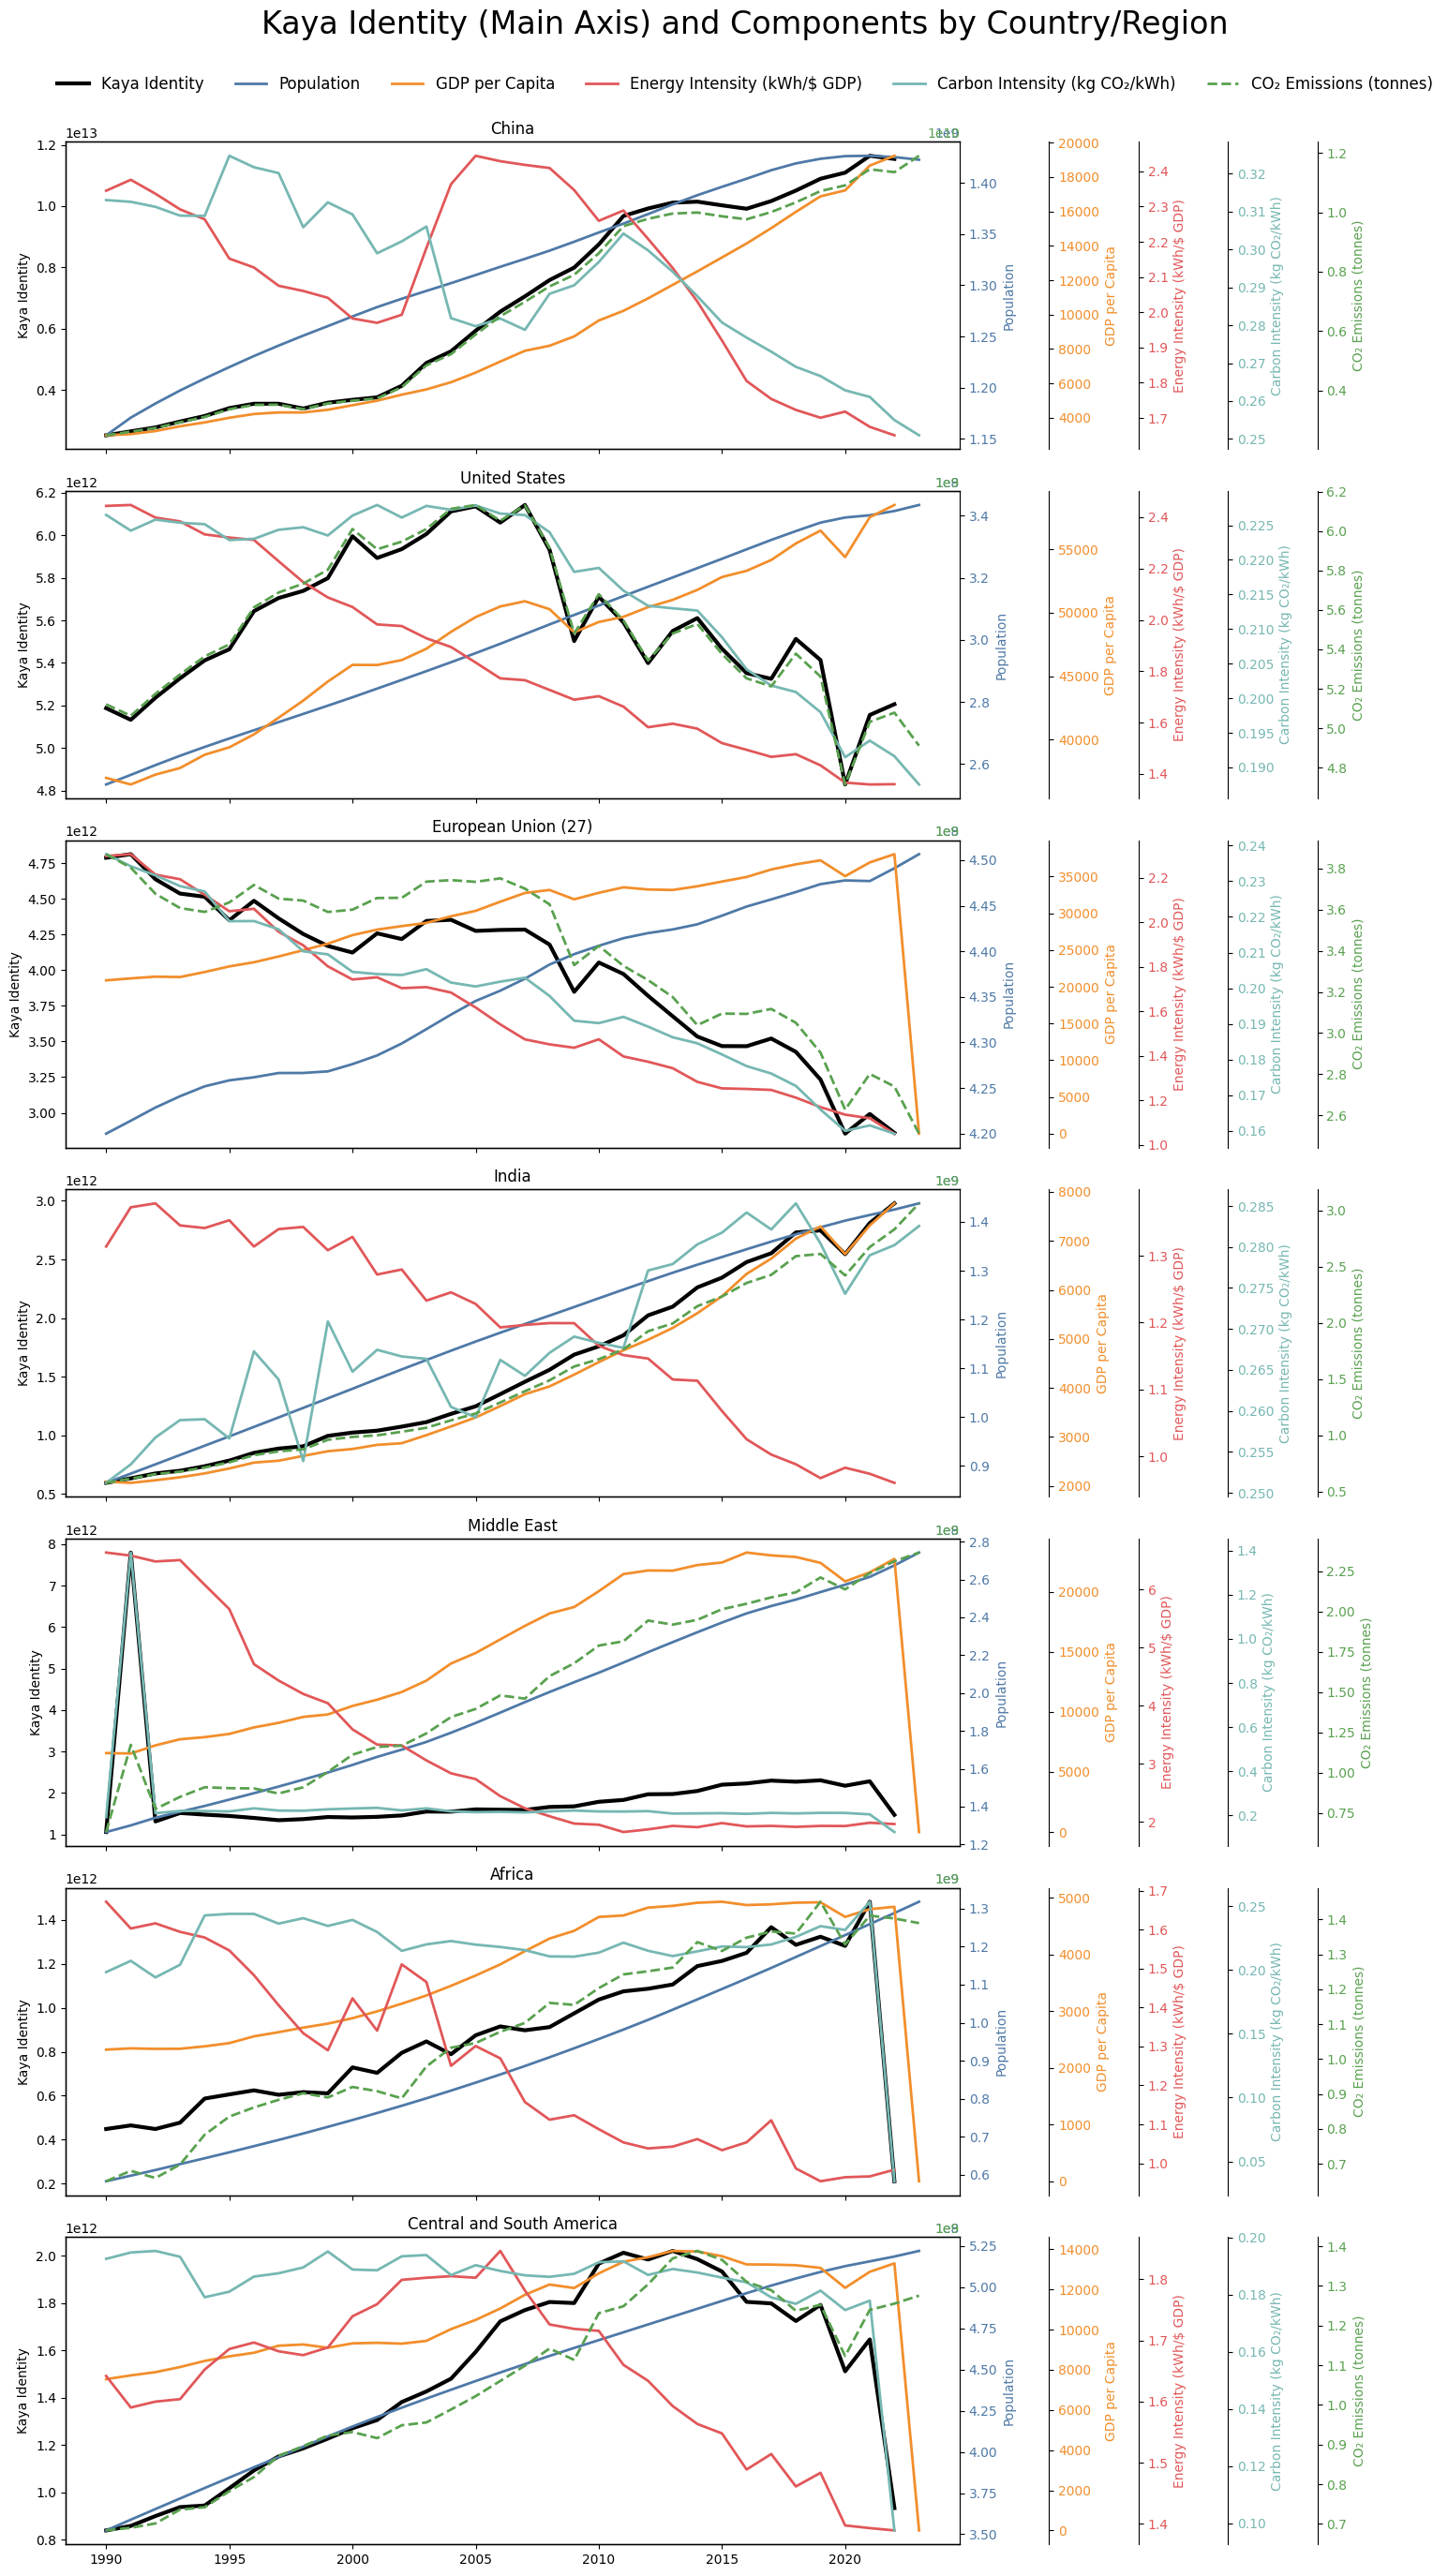

In [91]:


def plot_kaya_identity_main_axis(df, entities, year_start=1990, year_end=2023):
    components = [
        ('Population (historical)', 'Population'),
        ('GDP per capita', 'GDP per Capita'),
        ('Primary energy consumption per GDP (kWh/$)', 'Energy Intensity (kWh/$ GDP)'),
        ('Annual CO₂ emissions per unit energy (kg per kilowatt-hour)', 'Carbon Intensity (kg CO₂/kWh)')
    ]
    colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2']
    emission_col = ('Annual CO₂ emissions', 'CO₂ Emissions (tonnes)')

    n = len(entities)
    fig, axs = plt.subplots(n, 1, figsize=(16, 4 * n), sharex=True)

    if n == 1:
        axs = [axs]

    for idx, entity in enumerate(entities):
        subset = df[(df['Entity'] == entity) & (df['Year'] >= year_start) & (df['Year'] <= year_end)].copy()
        if subset.empty:
            print(f"No data for {entity} between {year_start} and {year_end}")
            continue

        # --- Plot Kaya Identity (only where all components are valid and non-negative) ---
        valid_kaya = subset.copy()
        for col, _ in components:
            valid_kaya = valid_kaya[(valid_kaya[col] >= 0) & (~valid_kaya[col].isna())]
        valid_kaya['Kaya Identity'] = (
            valid_kaya[components[0][0]] *
            valid_kaya[components[1][0]] *
            valid_kaya[components[2][0]] *
            valid_kaya[components[3][0]]
        )

        ax = axs[idx]
        ax.set_title(entity)
        lines = []
        # Kaya Identity as thick black line
        l_kaya, = ax.plot(valid_kaya['Year'], valid_kaya['Kaya Identity'], color='black', linewidth=3, label='Kaya Identity')
        lines.append(l_kaya)
        ax.set_ylabel('Kaya Identity', color='black')
        ax.tick_params(axis='y', labelcolor='black')

        y_axes = [ax]

        # --- Plot each component on its own y-axis, only where valid ---
        for i, (col, label) in enumerate(components):
            ax_new = ax.twinx()
            ax_new.spines["right"].set_position(("axes", 1 + 0.1 * i))
            valid_comp = subset[(subset[col] >= 0) & (~subset[col].isna())]
            l, = ax_new.plot(valid_comp['Year'], valid_comp[col], color=colors[i], label=label, linewidth=2)
            lines.append(l)
            ax_new.set_ylabel(label, color=colors[i])
            ax_new.tick_params(axis='y', labelcolor=colors[i])
            y_axes.append(ax_new)

        # --- Plot actual CO₂ emissions on the last y-axis, only where valid ---
        ax_em = ax.twinx()
        ax_em.spines["right"].set_position(("axes", 1 + 0.1 * len(components)))
        valid_em = subset[(subset[emission_col[0]] >= 0) & (~subset[emission_col[0]].isna())]
        l_em, = ax_em.plot(valid_em['Year'], valid_em[emission_col[0]], color='#59a14f', label=emission_col[1], linewidth=2, linestyle='dashed')
        lines.append(l_em)
        ax_em.set_ylabel(emission_col[1], color='#59a14f')
        ax_em.tick_params(axis='y', labelcolor='#59a14f')
        y_axes.append(ax_em)

        if idx == 0:
            labels = ['Kaya Identity'] + [comp[1] for comp in components] + [emission_col[1]]
            fig.legend(
                lines, labels,
                loc='upper center',
                bbox_to_anchor=(0.5, 0.96),
                ncol=len(labels),
                fontsize=12,
                frameon=False
            )
    plt.xlabel("Year")
    plt.suptitle("Kaya Identity (Main Axis) and Components by Country/Region", fontsize=24, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage:
entities = [
    "China", "United States", "European Union (27)", "India",
    "Middle East", "Africa", "Central and South America"
]
plot_kaya_identity_main_axis(df_final, entities, 1990, 2023)



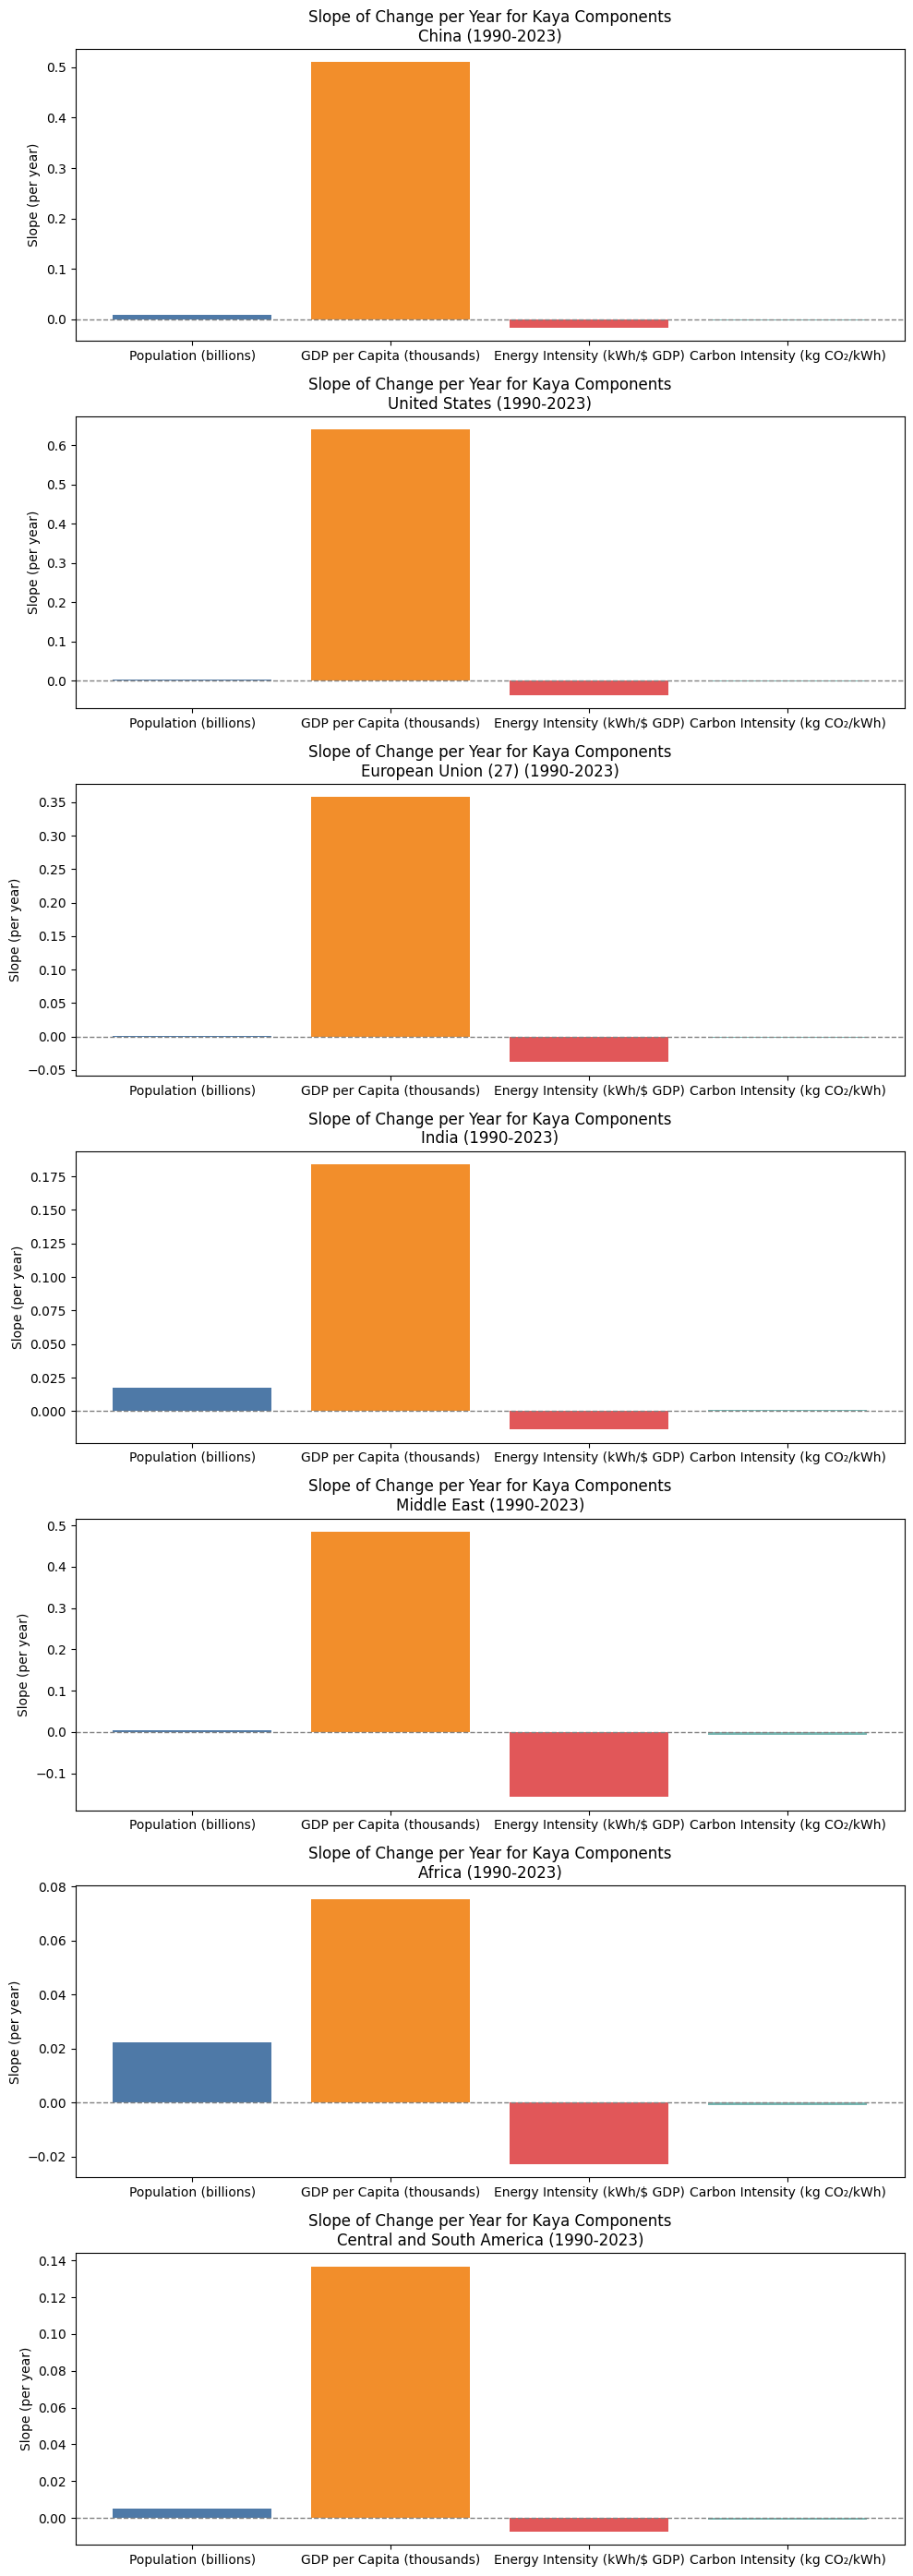

In [98]:
def kaya_slopes_bar_all_scaled(df, entities, year_start=1990, year_end=2023):
    components = [
        ('Population (historical)', 'Population (billions)', 1e9),
        ('GDP per capita', 'GDP per Capita (thousands)', 1e3),
        ('Primary energy consumption per GDP (kWh/$)', 'Energy Intensity (kWh/$ GDP)', 1),
        ('Annual CO₂ emissions per unit energy (kg per kilowatt-hour)', 'Carbon Intensity (kg CO₂/kWh)', 1)
    ]
    colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2']

    n = len(entities)
    fig, axs = plt.subplots(n, 1, figsize=(10, 4 * n), sharex=False)

    if n == 1:
        axs = [axs]

    for idx, entity in enumerate(entities):
        subset = df[(df['Entity'] == entity) & (df['Year'] >= year_start) & (df['Year'] <= year_end)]
        slopes = []
        for col, label, scale in components:
            valid = subset[['Year', col]].dropna()
            valid = valid[valid[col] >= 0]
            if len(valid) < 2:
                slope = np.nan
            else:
                years = valid['Year'].values
                y = valid[col].values / scale
                slope, _ = np.polyfit(years, y, 1)
            slopes.append(slope)
        axs[idx].bar([label for _, label, _ in components], slopes, color=colors)
        axs[idx].set_title(f"Slope of Change per Year for Kaya Components\n{entity} ({year_start}-{year_end})")
        axs[idx].set_ylabel("Slope (per year)")
        axs[idx].axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.show()

# Example usage:
entities = [
    "China", "United States", "European Union (27)", "India",
    "Middle East", "Africa", "Central and South America"
]
kaya_slopes_bar_all_scaled(df_final, entities, 1990, 2023)




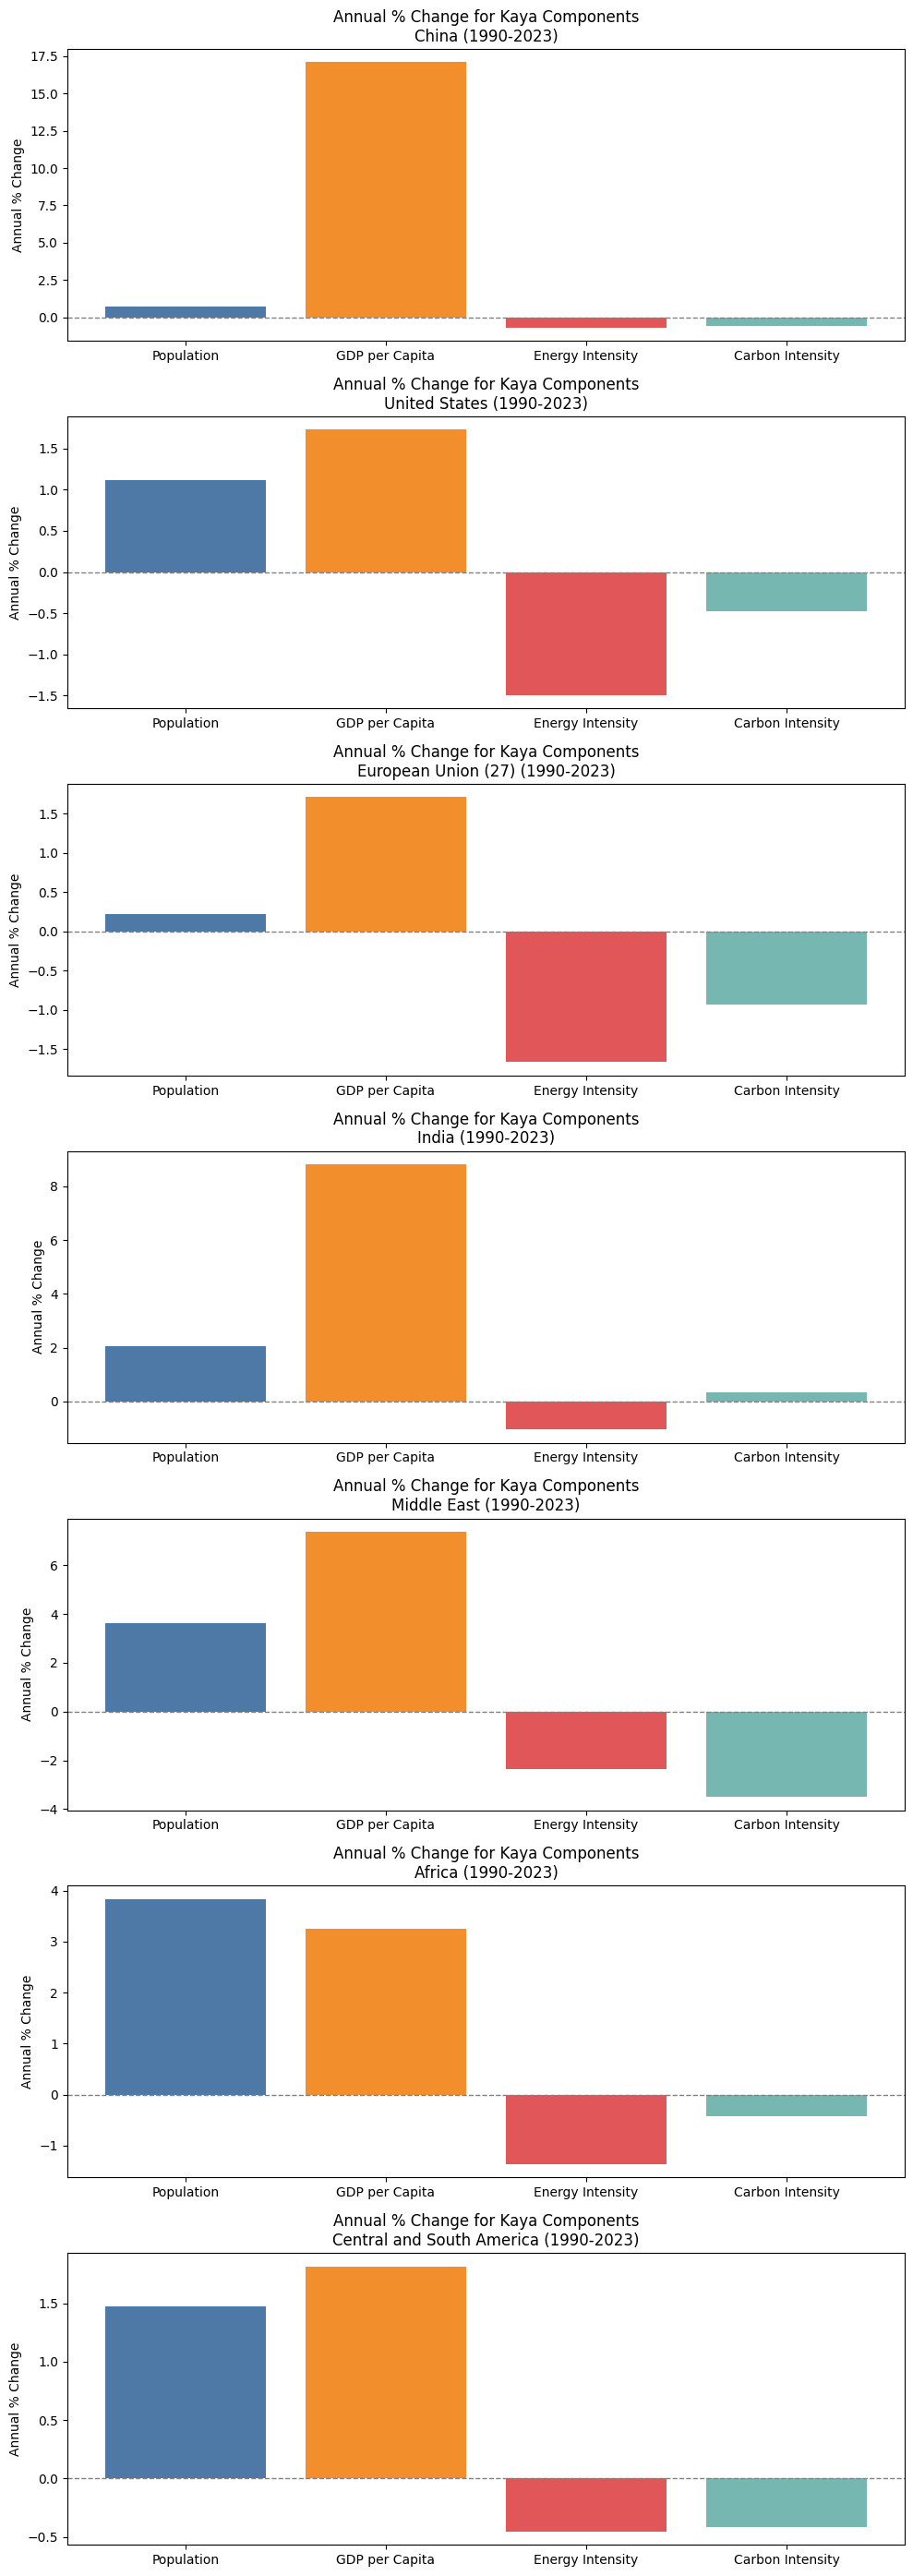

In [97]:
def kaya_slopes_bar_all_percent(df, entities, year_start=1990, year_end=2023):
    components = [
        ('Population (historical)', 'Population'),
        ('GDP per capita', 'GDP per Capita'),
        ('Primary energy consumption per GDP (kWh/$)', 'Energy Intensity'),
        ('Annual CO₂ emissions per unit energy (kg per kilowatt-hour)', 'Carbon Intensity')
    ]
    colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2']

    n = len(entities)
    fig, axs = plt.subplots(n, 1, figsize=(10, 4 * n), sharex=False)

    if n == 1:
        axs = [axs]

    for idx, entity in enumerate(entities):
        subset = df[(df['Entity'] == entity) & (df['Year'] >= year_start) & (df['Year'] <= year_end)]
        percent_slopes = []
        for col, label in components:
            valid = subset[['Year', col]].dropna()
            valid = valid[valid[col] >= 0]
            if len(valid) < 2:
                percent_slope = np.nan
            else:
                years = valid['Year'].values
                y = valid[col].values
                slope, _ = np.polyfit(years, y, 1)
                initial = y[0]
                percent_slope = (slope / initial) * 100 if initial != 0 else np.nan
            percent_slopes.append(percent_slope)
        axs[idx].bar([label for _, label in components], percent_slopes, color=colors)
        axs[idx].set_title(f"Annual % Change for Kaya Components\n{entity} ({year_start}-{year_end})")
        axs[idx].set_ylabel("Annual % Change")
        axs[idx].axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.show()

# Example usage:
entities = [
    "China", "United States", "European Union (27)", "India",
    "Middle East", "Africa", "Central and South America"
]
kaya_slopes_bar_all_percent(df_final, entities, 1990, 2023)


/Users/amyliu/Documents/OpenMinds/OM/om-env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/amyliu/Documents/OpenMinds/OM/om-env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/amyliu/Documents/OpenMinds/OM/om-env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/amyliu/Documents/OpenMinds/OM/om-env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


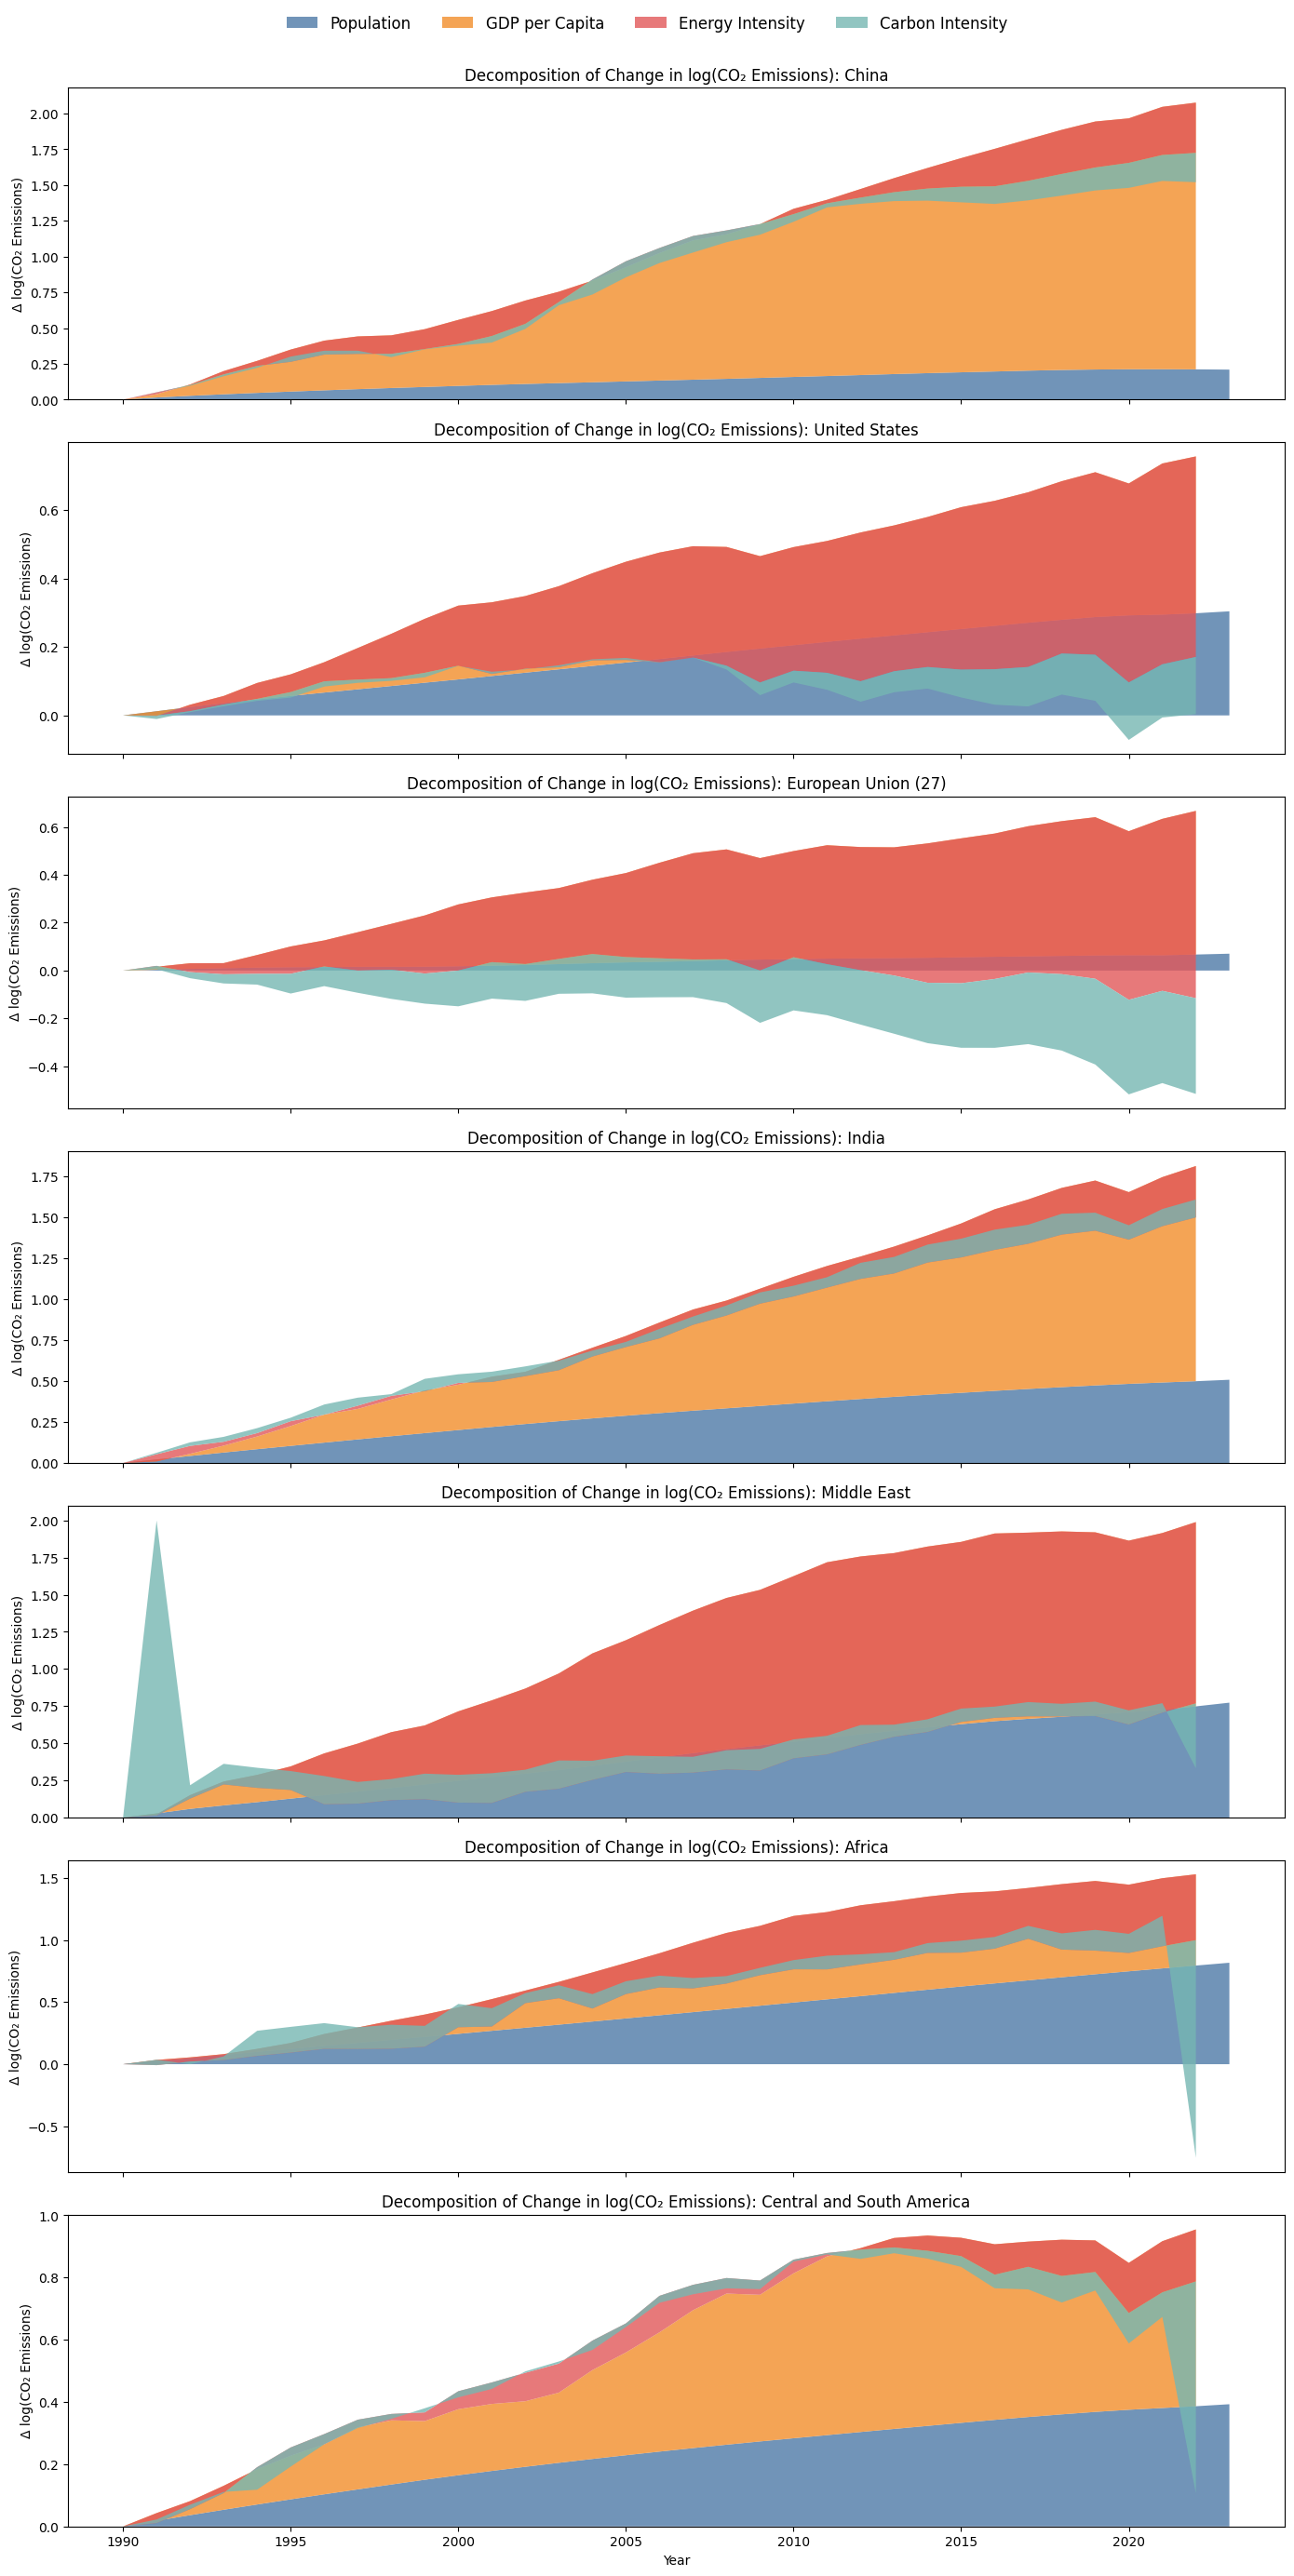

In [99]:
import numpy as np
import matplotlib.pyplot as plt

def kaya_decomposition_stacked_all(df, entities, year_start=1990, year_end=2023):
    labels = ['Population', 'GDP per Capita', 'Energy Intensity', 'Carbon Intensity']
    colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2']
    n = len(entities)
    fig, axs = plt.subplots(n, 1, figsize=(14, 4 * n), sharex=True)

    if n == 1:
        axs = [axs]

    for idx, entity in enumerate(entities):
        subset = df[(df['Entity'] == entity) & (df['Year'] >= year_start) & (df['Year'] <= year_end)].copy()
        if subset.empty:
            print(f"No data for {entity} between {year_start} and {year_end}")
            continue

        def safe_log(series):
            return np.log(series.where((series >= 0) & (~series.isna())))

        log_pop = safe_log(subset['Population (historical)'])
        log_gdp_pc = safe_log(subset['GDP per capita'])
        log_ei = safe_log(subset['Primary energy consumption per GDP (kWh/$)'])
        log_ci = safe_log(subset['Annual CO₂ emissions per unit energy (kg per kilowatt-hour)'])

        dlog_pop = log_pop - log_pop.iloc[0]
        dlog_gdp_pc = log_gdp_pc - log_gdp_pc.iloc[0]
        dlog_ei = log_ei - log_ei.iloc[0]
        dlog_ci = log_ci - log_ci.iloc[0]

        years = subset['Year'].values
        contributions = np.vstack([dlog_pop, dlog_gdp_pc, dlog_ei, dlog_ci])

        axs[idx].stackplot(years, contributions, colors=colors, alpha=0.8)
        axs[idx].set_title(f"Decomposition of Change in log(CO₂ Emissions): {entity}")
        axs[idx].set_ylabel("Δ log(CO₂ Emissions)")

    axs[-1].set_xlabel("Year")
    # Add a single shared legend for the colors/components
    fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=4, fontsize=12, frameon=False)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# Example usage:
entities = [
    "China", "United States", "European Union (27)", "India",
    "Middle East", "Africa", "Central and South America"
]
kaya_decomposition_stacked_all(df_final, entities, 1990, 2023)


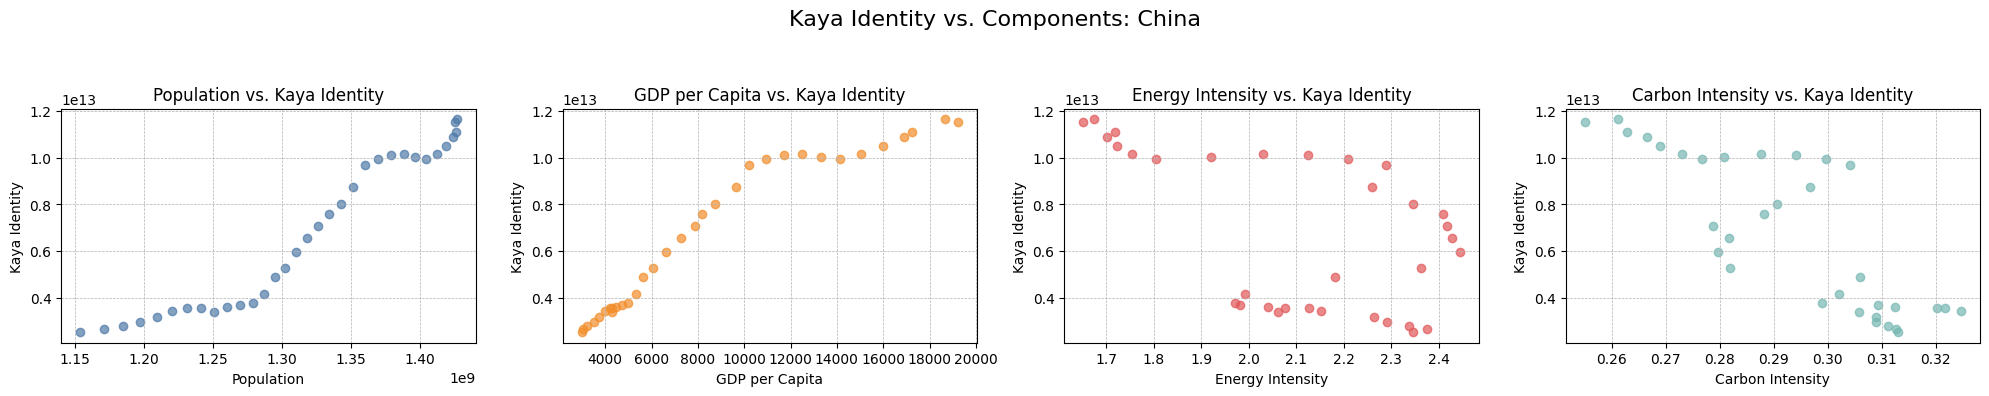

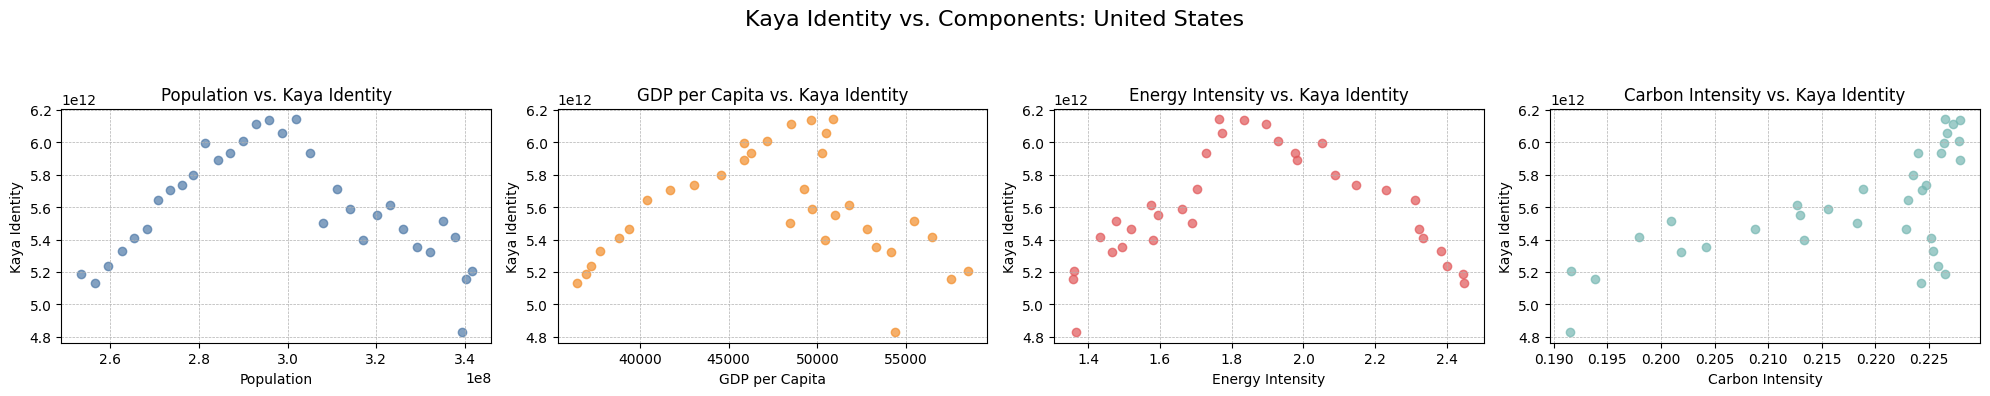

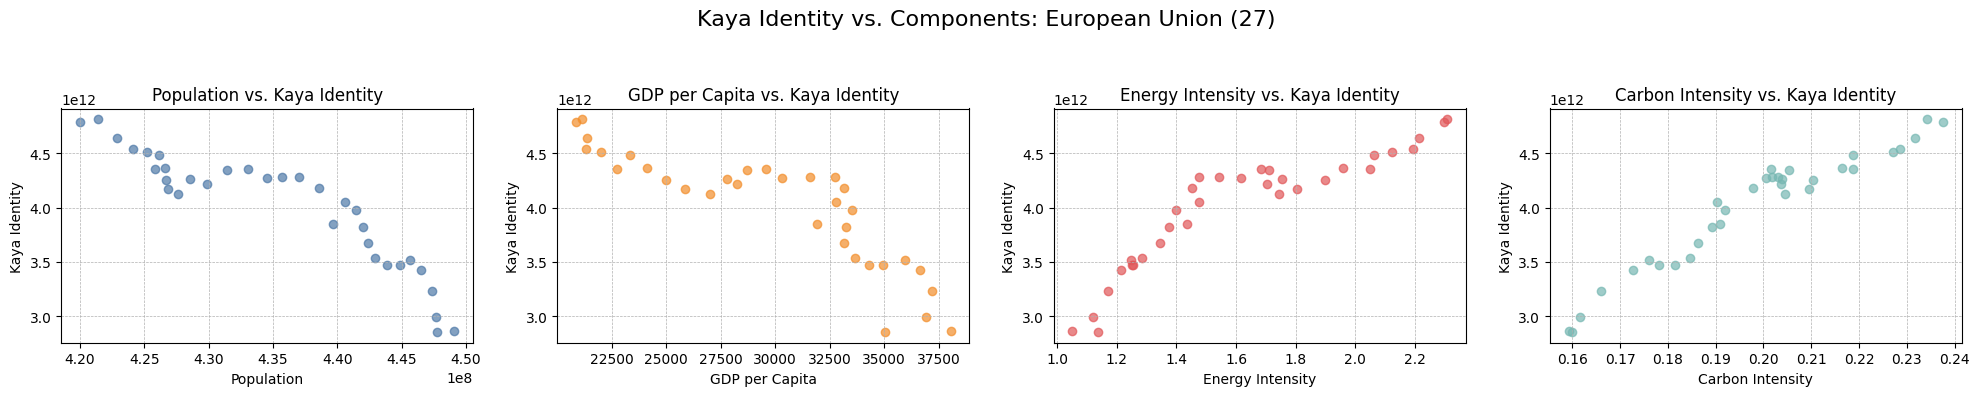

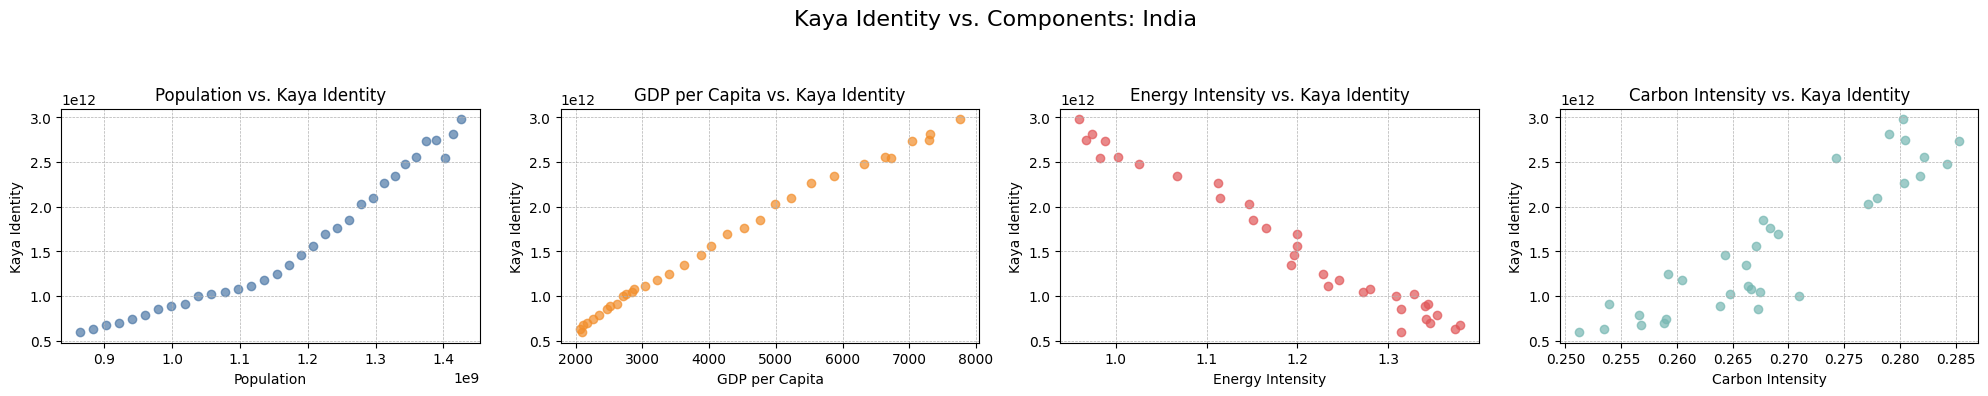

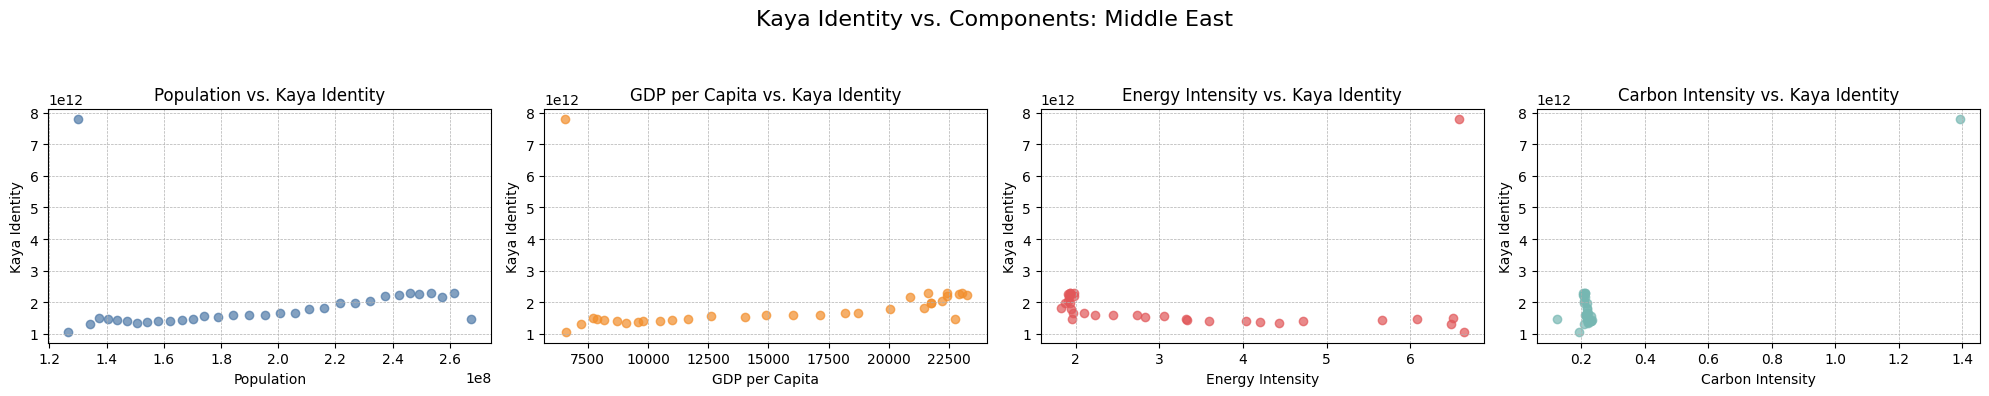

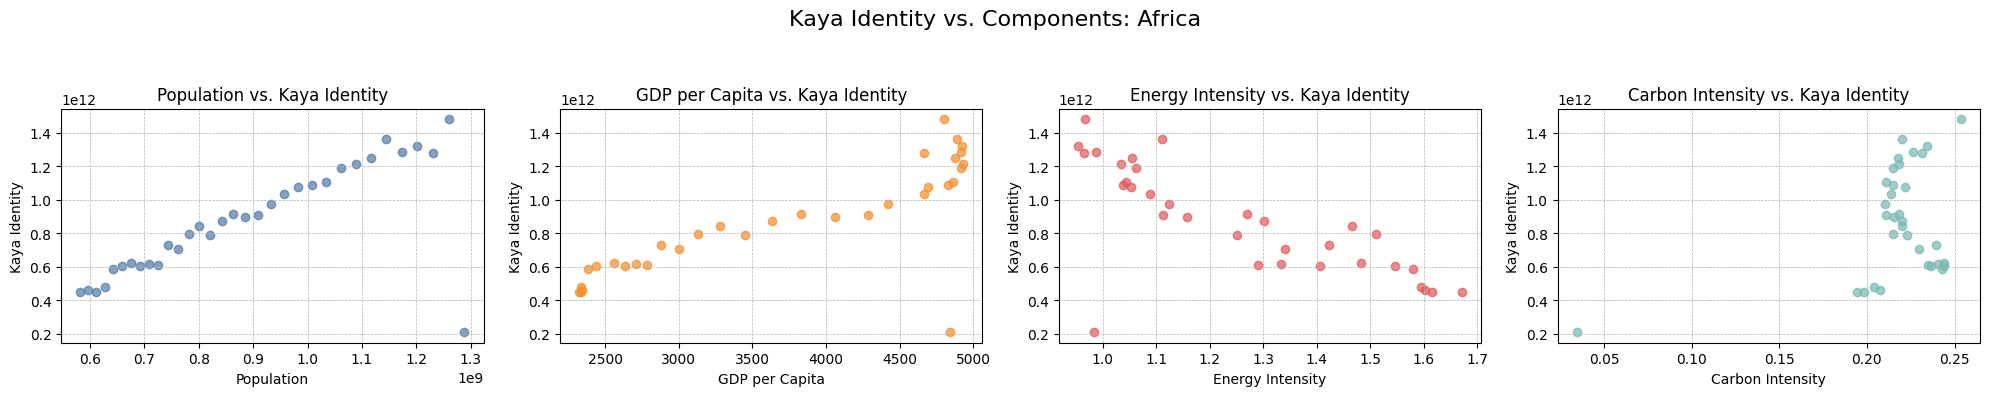

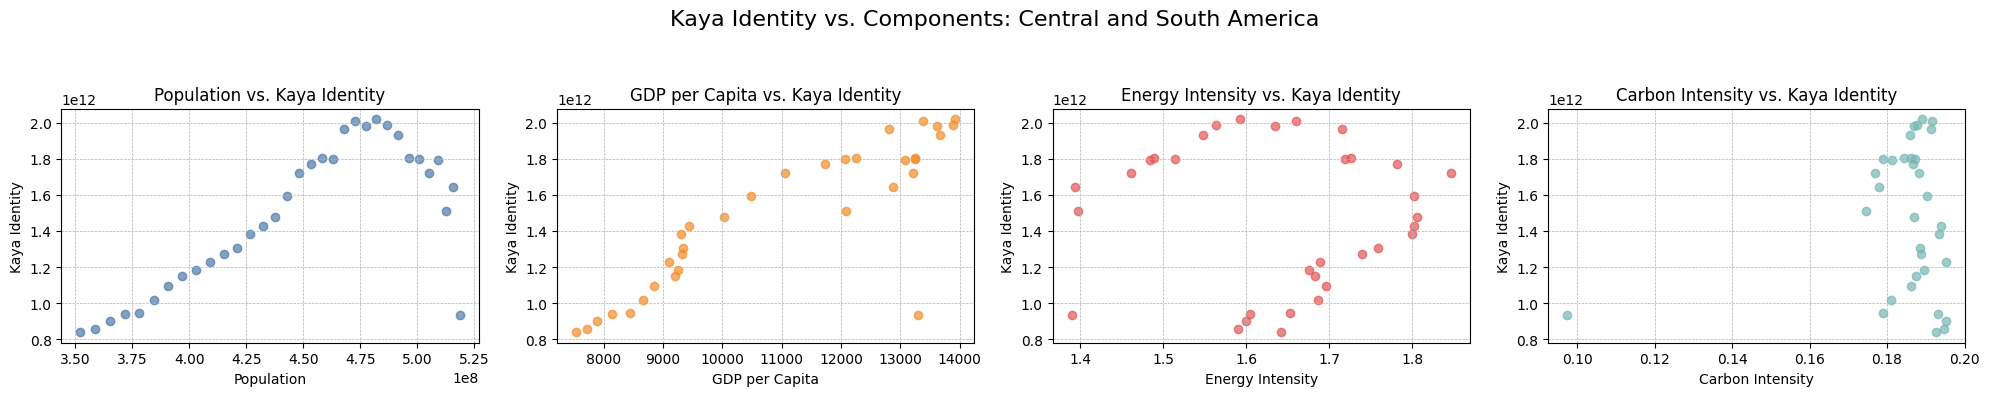

In [100]:
def kaya_correlation_subplots(df, entity, year_start=1990, year_end=2023):
    components = [
        ('Population (historical)', 'Population'),
        ('GDP per capita', 'GDP per Capita'),
        ('Primary energy consumption per GDP (kWh/$)', 'Energy Intensity'),
        ('Annual CO₂ emissions per unit energy (kg per kilowatt-hour)', 'Carbon Intensity')
    ]
    colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2']

    subset = df[(df['Entity'] == entity) & (df['Year'] >= year_start) & (df['Year'] <= year_end)].copy()
    if subset.empty:
        print(f"No data for {entity} between {year_start} and {year_end}")
        return

    # Calculate Kaya Identity only where all components are valid
    valid_kaya = subset.copy()
    for col, _ in components:
        valid_kaya = valid_kaya[(valid_kaya[col] >= 0) & (~valid_kaya[col].isna())]
    valid_kaya['Kaya Identity'] = (
        valid_kaya[components[0][0]] *
        valid_kaya[components[1][0]] *
        valid_kaya[components[2][0]] *
        valid_kaya[components[3][0]]
    )

    fig, axs = plt.subplots(1, 4, figsize=(20, 4))
    for i, (col, label) in enumerate(components):
        # Only plot where both the component and Kaya Identity are valid
        valid = valid_kaya[(valid_kaya[col] >= 0) & (~valid_kaya[col].isna()) & (valid_kaya['Kaya Identity'] >= 0) & (~valid_kaya['Kaya Identity'].isna())]
        axs[i].scatter(valid[col], valid['Kaya Identity'], color=colors[i], alpha=0.7)
        axs[i].set_xlabel(label)
        axs[i].set_ylabel("Kaya Identity")
        axs[i].set_title(f"{label} vs. Kaya Identity")
        axs[i].grid(True, linestyle='--', linewidth=0.5)
    fig.suptitle(f"Kaya Identity vs. Components: {entity}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Example usage for all regions:
entities = [
    "China", "United States", "European Union (27)", "India",
    "Middle East", "Africa", "Central and South America"
]
for entity in entities:
    kaya_correlation_subplots(df_final, entity, 1990, 2023)
